# Kaggle HomeCredit EDA 

# 前書き

不十分な、または存在しないクレジット履歴のために、多くの人々が融資を受けるのに苦労しています。 そして、残念なことに、この人口は、信頼できない貸し手によってしばしば利用されます。

ホームクレジットは、肯定的で安全な借入経験を提供することによって、非銀行人口の財政的包摂を広げるよう努める。 この不十分な人口が積極的なローン経験を持っていることを確認するために、ホームクレジットは、顧客の返済能力を予測するために、電話や取引情報を含むさまざまな代替データを利用しています。

ホームクレジットは現在、これらの予測を行うためにさまざまな統計的方法や機械学習方法を使用していますが、彼らは彼らのデータの潜在能力を最大限に発揮させるためにKagglersに挑戦しています。 そうすることで、返済可能なクライアントが拒絶されないこと、およびクライアントが成功するためのプリンシパル、成熟度、返済カレンダーでローンが提供されることが保証されます。




私は、色々とTRAINデータだけを使い色々と学習しスコアを出してきましたが、なかなか良いスコアが出なかったので、  
今回は与えられた様々なデータを使い検証しています。  
trainデータより先にbureau_balanceデータに着目していることをご了承ください。  
また引き続きこのコンペへの参加は続けていこうと思っていますので、今回のカーネルに関してはごく一部の情報に目を向けて分析しています。

## カーネルでの作業

１,データのインポート、データの確認

2,各データの整理

3,カテゴリ変数を様々なモデルで使えるよう数字変数にエンコード

4,私の気になったbureau_balanceの分析

5,全てのデータをマージし学習

# ライブラリインポート

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.preprocessing import LabelEncoder
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import lightgbm as lgb

# データインポート 

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [3]:
train = pd.read_csv("input/application_train.csv")
test = pd.read_csv("input/application_test.csv")
bureau = pd.read_csv("input/bureau.csv")
bbalance = pd.read_csv("input/bureau_balance.csv")
pos = pd.read_csv("input/POS_CASH_balance.csv")
insta = pd.read_csv("input/installments_payments.csv")
previous = pd.read_csv("input/previous_application.csv")
credit = pd.read_csv("input/credit_card_balance.csv")

In [4]:
#readme = credit = pd.read_csv("input/HomeCredit_columns_description.csv")

In [5]:
bbalance = pd.read_csv("input/bureau_balance.csv")

# ~~特徴の説明データ~~

In [6]:
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 200)

# データの確認

In [7]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
bbalance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [11]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [12]:
insta.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [13]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# オブジェクト（文字）エンコード

まずはカテゴリ変数を数字列に変更して、様々なモデルで学習できるように数字変数に書き換えます。  
下記では、特徴量が２種類あるものはラベルエンコーダーを使用し３種類以上の物はダミー変数を使い変更する関数を作ります。  
またそれに加え、ユーザーIDの重複があるものは平均を取り1つのデータにまとめます。

In [15]:
le = LabelEncoder()
def les(data):
    
    for col in data:
        if data[col].dtype == "object":
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])
            
                data[col] = le.transform(data[col])
                
    data = pd.get_dummies(data)
    data = data.groupby('SK_ID_CURR').mean().reset_index()
    return data

# bureauデータとbblanceデータはセットなので結合していく

In [16]:
bureau.sort_values(by="SK_ID_BUREAU")

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1706035,166497,5000000,Closed,currency 1,-2918,0,-2613.0,-2639.0,NaN,0,29443.500,0.000,NaN,0.0,Consumer credit,-2512,NaN
1706036,166497,5000001,Closed,currency 1,-1015,0,-831.0,-891.0,2223.855,0,13810.500,0.000,0.0,0.0,Consumer credit,-891,NaN
61505,166497,5000002,Closed,currency 1,-149,0,-26.0,-26.0,0.000,0,13455.000,0.000,0.0,0.0,Consumer credit,-23,NaN
61506,166497,5000003,Closed,currency 1,-135,0,230.0,-42.0,0.000,0,37350.000,0.000,0.0,0.0,Consumer credit,-42,NaN
61507,166497,5000004,Active,currency 1,-47,0,320.0,NaN,0.000,0,315127.620,315127.620,0.0,0.0,Consumer credit,-17,NaN
61508,356385,5000005,Active,currency 1,-459,0,148.0,NaN,NaN,0,270000.000,84505.500,0.0,0.0,Consumer credit,-32,NaN
1706037,375916,5000006,Closed,currency 1,-2850,0,-1756.0,-2227.0,NaN,0,900000.000,0.000,NaN,0.0,Loan for business development,-2227,NaN
61509,375916,5000009,Closed,currency 1,-2581,0,-765.0,-757.0,NaN,0,1350000.000,0.000,NaN,0.0,Loan for business development,-757,NaN
61510,375916,5000010,Closed,currency 1,-352,0,-332.0,-334.0,NaN,0,22500.000,0.000,NaN,0.0,Microloan,-327,NaN
61511,375916,5000011,Active,currency 1,-20,0,10.0,NaN,NaN,0,27000.000,29025.000,NaN,0.0,Microloan,-15,NaN


まず、bureau_balanceの中身を見ていきましょう。  
STATUSは返済の遅延状況で、MONTHS_BALANCEは未返済残高になります。

In [17]:
bbalance.sort_values(by="SK_ID_BUREAU")

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079760,5001709,-7,C
26079756,5001709,-3,C
26079757,5001709,-4,C
26079758,5001709,-5,C
26079759,5001709,-6,C
26079761,5001709,-8,C
26079762,5001709,-9,C
26079763,5001709,-10,C
26079764,5001709,-11,C
26079765,5001709,-12,C


In [18]:
bbalance[bbalance["STATUS"] == 2].sort_values(by="MONTHS_BALANCE")

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS


bbalanceのX（不明）を~~抜き~~、C(未返済）を０に変更

*bbalanceの返済期間と返済金の平均をユーザーごとに算出

*XをNANに変更

In [19]:
bbalance["STATUS"] = bbalance["STATUS"].replace("X",10)
bbalance["STATUS"] = bbalance["STATUS"].replace("C",0)
bbalance["STATUS"] = bbalance["STATUS"].map(int)
bbalance["STATUS"] = bbalance["STATUS"].replace(10,np.NaN)

日付がマイナスなので、絶対値に直していきます。

In [20]:
bbalance["MONTHS_BALANCE"] = abs(bbalance["MONTHS_BALANCE"])

In [21]:
bbalance.shape

(27299925, 3)

In [22]:
# plt.scatter(bbalance["MONTHS_BALANCE"],bbalance["STATUS"])
# plt.xlabel("MONTHS_BALANCE")
# plt.ylabel("STATUS")
# plt.legend()

In [23]:
le = LabelEncoder()
for col in bbalance:
    if bbalance[col].dtype == "object":
        if len(list(bbalance[col].unique())) <= 2:
            le.fit(bbalance[col])
            
            bbalance[col] = le.transform(data[col])
                
    bbalance = pd.get_dummies(bbalance)
    bbalance = bbalance.groupby('SK_ID_BUREAU').mean().reset_index()

bureauにデータをマージしbureauのデータも整理していきます。

In [24]:
bureau_df =  pd.merge(bureau, bbalance,on='SK_ID_BUREAU',how='left')

In [25]:
bureau_df.sort_values(by="STATUS")

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
768,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000,13.0,0.0
1039350,273595,5765568,Closed,currency 1,-1260,0,-164.0,-1111.0,NaN,0,525757.500,0.000,0.000,0.0,Consumer credit,-128,488592.000,20.5,0.0
1039351,273595,5765569,Closed,currency 1,-1338,0,-607.0,-1260.0,NaN,0,370350.000,0.000,0.000,0.0,Consumer credit,-128,347548.500,22.0,0.0
1039352,273595,5765570,Closed,currency 1,-1631,0,-535.0,-1338.0,NaN,0,344659.500,0.000,0.000,0.0,Consumer credit,-128,283567.500,26.5,0.0
1039353,273595,5765571,Closed,currency 1,-997,0,NaN,-475.0,NaN,0,900000.000,0.000,0.000,0.0,Credit card,-128,0.000,16.0,0.0
1039354,273595,5765572,Closed,currency 1,-1275,0,NaN,-475.0,NaN,0,225000.000,0.000,0.000,0.0,Credit card,-128,0.000,20.5,0.0
1039355,273595,5765573,Active,currency 1,-477,0,1349.0,NaN,NaN,0,1730835.000,1386175.500,0.000,0.0,Consumer credit,-20,47272.500,7.5,0.0
1039356,273595,5765574,Active,currency 1,-1354,0,-623.0,NaN,NaN,0,456750.000,411610.500,NaN,0.0,Consumer credit,-1261,24606.000,22.0,0.0
1039357,273595,5765575,Closed,currency 1,-1385,0,-654.0,-1353.0,NaN,0,225000.000,0.000,NaN,0.0,Consumer credit,-1351,13293.000,22.5,0.0
1039358,273595,5765576,Closed,currency 1,-1260,0,-164.0,-475.0,NaN,0,562500.000,0.000,NaN,0.0,Credit card,-475,0.000,20.5,0.0


In [26]:
bureau_df = les(bureau_df)

In [27]:
bureau_df["DAYS_CREDIT"] = abs(bureau_df["DAYS_CREDIT"])
bureau_df["DAYS_CREDIT_UPDATE"] = abs(bureau_df["DAYS_CREDIT_UPDATE"])

In [28]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100001,5896633.000,735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,93.142857,3545.357143,11.785714,0.010989,0.428571,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,6153272.125,874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,499.875000,0.000000,21.875000,0.299222,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,5885878.500,1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,816.000000,NaN,NaN,NaN,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,6829133.500,867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,532.000000,NaN,NaN,NaN,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,6735201.000,190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,54.333333,1420.500000,3.000000,0.000000,0.666667,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


欠損データの確認

In [106]:
bureau_df.isnull().sum()

SK_ID_CURR                                                       0
SK_ID_BUREAU                                                     0
DAYS_CREDIT                                                      0
CREDIT_DAY_OVERDUE                                               0
DAYS_CREDIT_ENDDATE                                           2585
DAYS_ENDDATE_FACT                                            37656
AMT_CREDIT_MAX_OVERDUE                                       92840
CNT_CREDIT_PROLONG                                               0
AMT_CREDIT_SUM                                                   2
AMT_CREDIT_SUM_DEBT                                           8372
AMT_CREDIT_SUM_LIMIT                                         25308
AMT_CREDIT_SUM_OVERDUE                                           0
DAYS_CREDIT_UPDATE                                               0
AMT_ANNUITY                                                 187587
MONTHS_BALANCE                                              17

# instaデータの前処理

In [30]:
insta.sort_values(by="SK_ID_PREV")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
512588,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
2159480,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
3411021,1000002,101962,1.0,3,-1540.0,-1559.0,6264.000,6264.000
1214732,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000
1006868,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
1631862,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
7054246,1000003,252457,1.0,2,-64.0,-81.0,4951.350,4951.350
6145031,1000003,252457,1.0,1,-94.0,-108.0,4951.350,4951.350
4279518,1000003,252457,1.0,3,-34.0,-49.0,4951.350,4951.350
5197652,1000004,260094,1.0,5,-742.0,-752.0,3391.110,3391.110


In [31]:
insta["DAYS_INSTALMENT"] = abs(insta["DAYS_INSTALMENT"])
insta["DAYS_ENTRY_PAYMENT"] = abs(insta["DAYS_ENTRY_PAYMENT"])

In [32]:
#エンコード　重複処理
insta = les(insta)

# creditデータの前処理

In [33]:
credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [34]:
credit["MONTHS_BALANCE"] = abs(credit["MONTHS_BALANCE"])

In [35]:
credit= les(credit)

# POSデータの前処理

In [36]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [37]:
pos["MONTHS_BALANCE"] = abs(pos["MONTHS_BALANCE"])

In [38]:
pos = les(credit)

# previousの前処理

In [39]:
previous.sort_values(by="SK_ID_CURR").head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0


In [40]:
previous["DAYS_DECISION"] = abs(previous["DAYS_DECISION"])

In [41]:
previous = les(previous)

In [42]:
# previous_df =  pd.merge(previous,pos,on='SK_ID_CURR',how='left')
# previous_df = pd.merge(previous_df, credit,on='SK_ID_CURR',how='left')
# previous_df = pd.merge(previous_df, insta,on='SK_ID_CURR',how='left')

# ~~データ学習β　light gbm~~

# trainデータとbreauデータをマージ

trainデータの特徴はTARGETとの相関係数がとても低かったので、別の視点から分析してみます。  
私の予想では、他社の金融会社情報内にある過去の返済遅延情報がTARGETと関係あると考えました。  
何故ならば、他社の返済が滞っている人は今回も同じ過ちを繰り返す可能性があると思ったからです。  
まずはターゲットを分けて数の違いを見てみます。

In [43]:
train_df = pd.merge(train,bureau_df,on='SK_ID_CURR',how='left')
test_df = pd.merge(test,bureau_df,on='SK_ID_CURR',how='left')

In [44]:
target1 = train_df[train_df["TARGET"] == 1]
target0 = train_df[train_df["TARGET"] == 0]

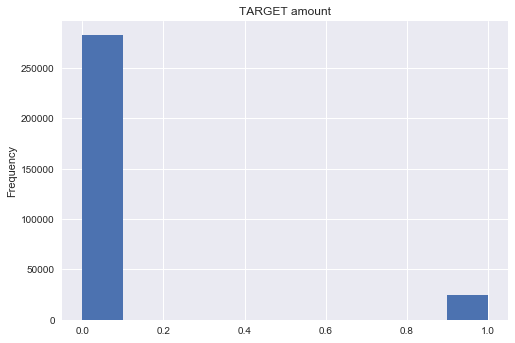

In [45]:
train['TARGET'].astype(int).plot.hist()
plt.title("TARGET amount")

TARGETのデータ量は０（返済完了者）の方が、１（返済不可能者）よりはるかに多いことがわかりました。  
それを踏まえた上で、"MONTHS_BALANCE"と"STATUS"がどのくらいTARGETと関係があるかみていきます。

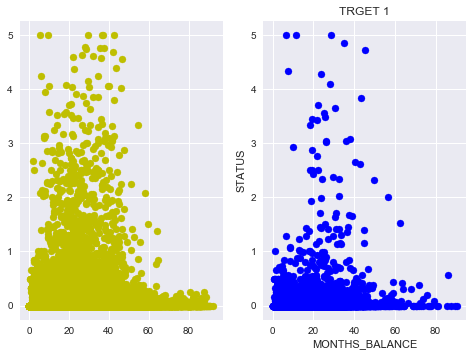

In [105]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(target0["MONTHS_BALANCE"], target0["STATUS"], color="y" )
ax[1].scatter(target1["MONTHS_BALANCE"], target1["STATUS"], color="blue")
plt.xlabel("MONTHS_BALANCE")
plt.ylabel("STATUS")
plt.title("TRGET 1")
plt.show()
# *左が０右が１

散布図ではよく差がわからないので、返済の遅れた人がどのくらいの割合か見ていきます。

In [47]:
par1 = len(target1[target1["STATUS"] >= 1]) / len(target1) * 100

In [48]:
par0 = len(target0[target0["STATUS"] >= 1])  /len(target0) * 100

In [49]:
print(str(par0)+"%    ",str(par1)+"%")

0.15600348089399546%     0.2940584088620342%


なんと今まで様々な特徴で検証し相関が少なく目に見えて分かる差がなかったですが、TARGET１の返済の滞ってる人が30％もいることが分かりました。  
逆にTARGET0では返済が滞ってる人が１５％しかいません。  
これは私が最初に考えた返済の滞りがあるひとは返せなくなる確率が高くなるという一つの結論を出しました。  
私はこれが、とても重要な特徴だと思います。

In [50]:
correlation = train_df.corr()

In [51]:
correlation["TARGET"].sort_values()

EXT_SOURCE_3                                         -0.178919
EXT_SOURCE_2                                         -0.160472
EXT_SOURCE_1                                         -0.155317
DAYS_CREDIT                                          -0.089729
CREDIT_ACTIVE_Closed                                 -0.079369
MONTHS_BALANCE                                       -0.076424
DAYS_CREDIT_UPDATE                                   -0.068927
DAYS_EMPLOYED                                        -0.044932
FLOORSMAX_AVG                                        -0.044003
FLOORSMAX_MEDI                                       -0.043768
FLOORSMAX_MODE                                       -0.043226
AMT_GOODS_PRICE                                      -0.039645
REGION_POPULATION_RELATIVE                           -0.037227
ELEVATORS_AVG                                        -0.034199
ELEVATORS_MEDI                                       -0.033863
FLOORSMIN_AVG                                        -0

EXT_SOURCE_1 は　年齢と勤務期間に強く相関がある。  
EXT_SOURCE_3　はクレジット周りの情報と相関が強い

EXT_SOURCEの相関係数をプロットして見やすくしていきます。

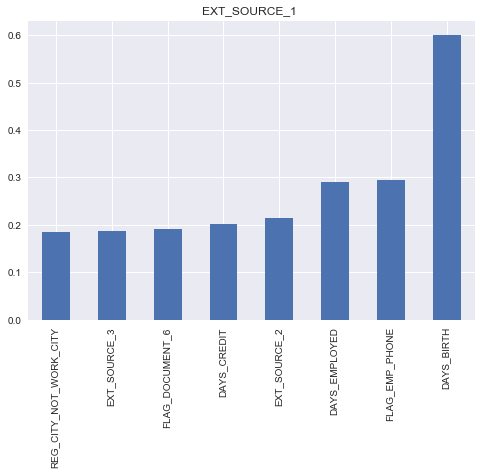

In [123]:
abs(correlation["EXT_SOURCE_1"]).sort_values()[-10:-2].plot.bar()
plt.title("EXT_SOURCE_1 ")

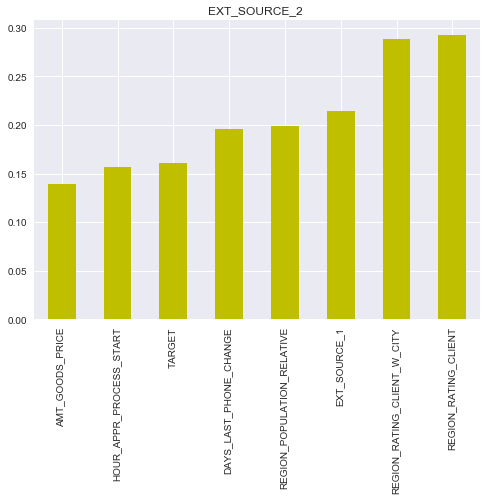

In [128]:
abs(correlation["EXT_SOURCE_2"]).sort_values()[-10:-2].plot.bar(color = "y")
plt.title("EXT_SOURCE_2 ")

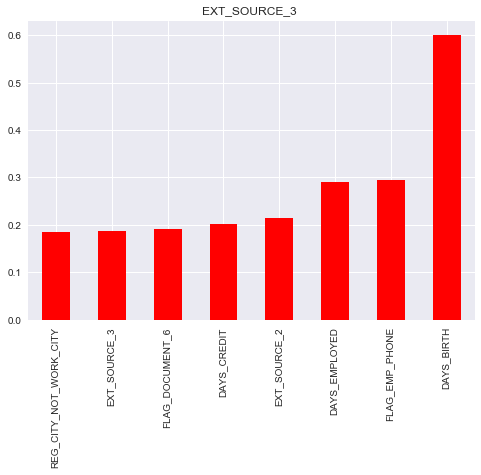

In [129]:
abs(correlation["EXT_SOURCE_1"]).sort_values()[-10:-2].plot.bar(color = "r")
plt.title("EXT_SOURCE_3 ")

# TARGETとの相関関係

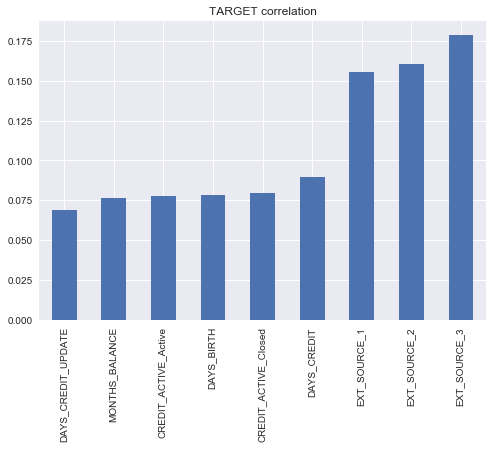

In [81]:
abs(correlation["TARGET"]).sort_values()[-10:-1].plot.bar()
plt.title("TARGET correlation")

上記を見てtrainデータとtargetデータの相関は全体的に低いことが分かりました。  
次はtrainデータの統計を見ていきます。

In [53]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,MONTHS_BALANCE,STATUS,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000

DAYS_EMPLOYEDのMAXが１０００年ほどになっています。  
これは処理しないといけないので、まず異常値の数を見ていきます。

# DAYS_EMPLOYED の異常値を処理する

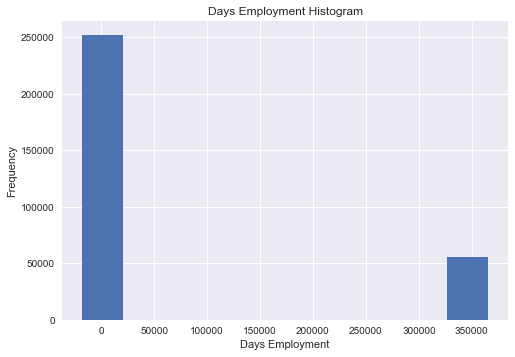

In [54]:
train_df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [55]:
train_df.shape

(307511, 160)

異常はデフォルト率が低いことが判明しました。

異常の処理は、ルールが設定されていない正確な状況によって異なります。最も安全なアプローチの1つは、異常を欠損値に設定し、機械学習の前にそれらを埋め込む（Imputationを使用して）ことです。この場合、すべての異常はまったく同じ値であるため、これらのすべての貸出金額が共通している場合には、同じ値で入力する必要があります。  
変則的な値は重要であると思われるので、我々は実際にこれらの値を記入したかどうかを機械学習モデルに伝えたいと思う。解決策として、数値（np.nan）以外の異常値を記入し、その値が異常であるかどうかを示す新しいブール値列を作成します。

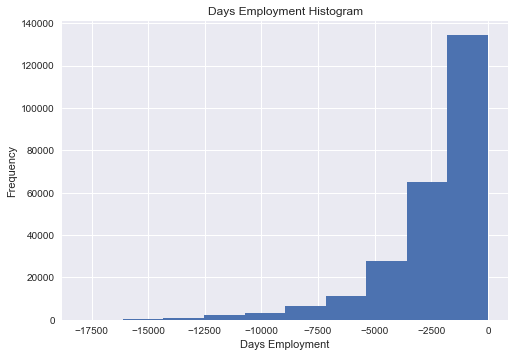

In [56]:
# Create an anomalous flag column
train_df['DAYS_EMPLOYED_ANOM'] = train_df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

test_df['DAYS_EMPLOYED_ANOM'] = test_df["DAYS_EMPLOYED"] == 365243
test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)



これで異常値がなくなったことがわかりました。  
一通りデータの分析が終わったので、trainデータに他のデータをマージします。

In [57]:
train_df["STATUS"].head()

0    0.299222
1         NaN
2         NaN
3         NaN
4         NaN
Name: STATUS, dtype: float64

# ~~全てのデータを　マージ~~
後回し、trainデータの整理

In [58]:
train_df = pd.merge(train_df,pos,on='SK_ID_CURR',how='left')
test_df = pd.merge(test_df,pos,on='SK_ID_CURR',how='left')

train_df = pd.merge(train_df,credit,on='SK_ID_CURR',how='left')
test_df = pd.merge(test_df,credit,on='SK_ID_CURR',how='left')

train_df = pd.merge(train_df,insta,on='SK_ID_CURR',how='left')
test_df = pd.merge(test_df,insta,on='SK_ID_CURR',how='left')

In [59]:

train_df = pd.merge(train_df,previous,on='SK_ID_CURR',how='left')
test_df = pd.merge(test_df,previous,on='SK_ID_CURR',how='left')

# train_df = pd.merge(train_df,bureau_df,on='SK_ID_CURR',how='left')
# test_df = pd.merge(test_df,bureau_df,on='SK_ID_CURR',how='left')

In [60]:
train_df.shape

(307511, 386)

# lightGBMを使い学習

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
    test_features = test_features.drop(['SK_ID_CURR'],axis = 1)
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
    
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [62]:
submission, fi, metrics = model(train_df, test_df)
print('Baseline metrics')
print(metrics)
print(submission)

Training Data Shape:  (307511, 541)
Testing Data Shape:  (48744, 541)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.774315	train's auc: 0.821788
[400]	valid's auc: 0.775014	train's auc: 0.857151
Early stopping, best iteration is:
[434]	valid's auc: 0.775195	train's auc: 0.862197
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.776672	train's auc: 0.822513
Early stopping, best iteration is:
[281]	valid's auc: 0.77757	train's auc: 0.838334
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.779433	train's auc: 0.822042
[400]	valid's auc: 0.780472	train's auc: 0.857106
Early stopping, best iteration is:
[357]	valid's auc: 0.780781	train's auc: 0.85035
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.777277	train's auc: 0.821815
Early stopping, best iteration is:
[246]	valid's auc: 0.77757	train's auc: 0.830993
Training until validation scores don't im

In [63]:
submission.to_csv('submission.csv', index = False)

In [64]:
previous.head()

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasification / water supply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Constru

In [65]:
CODE = pd.DataFrame()

for i in previous:
    if "CODE_REJECT_REASON" in i:
        CODE[i] = previous[i]
        

In [66]:
CODE["TARGET"] = train_df["TARGET"]
CODE.corr()

,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,TARGET
CODE_REJECT_REASON_CLIENT,1.000000,-0.031226,-0.015888,-0.005297,-0.013325,0.000021,-0.007759,-0.319513,0.000504,-0.000947
CODE_REJECT_REASON_HC,-0.031226,1.000000,-0.019871,-0.016729,0.006451,-0.002005,0.000549,-0.665427,-0.001635,-0.000108
CODE_REJECT_REASON_LIMIT,-0.015888,-0.019871,1.000000,0.011964,0.029756,-0.003471,0.002941,-0.461487,-0.004187,-0.000673
CODE_REJECT_REASON_SCO,-0.005297,-0.016729,0.011964,1.000000,0.005694,0.008459,0.004263,-0.360371,0.008843,-0.000232
CODE_REJECT_REASON_SCOFR,-0.013325,0.006451,0.029756,0.005694,1.000000,-0.004361,0.001596,-0.238569,-0.001146,-0.001056
CODE_REJECT_REASON_SYSTEM,0.000021,-0.002005,-0.003471,0.008459,-0.004361,1.000000,-0.002047,-0.046867,0.003387,-0.001274
CODE_REJECT_REASON_VERIF,-0.007759,0.000549,0.002941,0.004263,0.001596,-0.002047,1.000000,-0.101837,0.001670,0.003208
CODE_REJECT_REASON_XAP,-0.319513,-0.665427,-0.461487,-0.360371,-0.238569,-0.046867,-0.101837,1.000000,-0.114124,0.001064
CODE_REJECT_REASON_XNA,0.000504,-0.001635,-0.004187,0.008843,-0.001146,0.003387,0.001670,-0.114124,1.000000,-0.002468
TARGET,-0.000947,-0.000108,-0.000673,-0.000232,-0.001056,-0.001274,0.003208,0.001064,-0.002468,1.000000


In [67]:
print("test")

test


# 最後に
ここ一週間このコンペの分析を続け初めて目に見えるターゲットとの関係を見つけることができたことは、自分にとってかなり前進できたかと思います。
まだまだ途中ですが、引き続き頑張りたいと思います。